In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import math
import sklearn

%matplotlib inline

In [36]:
data = pd.read_csv('linkedin data.csv', usecols = range(0,8), parse_dates=[1,7])

In [39]:
industry_mean = data.groupby('industry').mean()
industry_total = data.groupby('industry').sum()

In [41]:
top5 = industry_total.sort_values(by='employees_on_platform',ascending=False).head()

In [152]:
data

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,year
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00:00,2015
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00:00,2015
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00:00,2015
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00:00,2015
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00:00,2015
5,58382,2015-09-16,UnitedHealth Group,221288,77108,https://www.linkedin.com/company/1720,Hospital & Health Care,2015-09-16 00:00:00+00:00,2015
6,58400,2015-09-16,McKesson,128090,17520,https://www.linkedin.com/company/1900,Hospital & Health Care,2015-09-16 00:00:00+00:00,2015
7,58433,2015-09-16,BBVA,109420,40933,https://www.linkedin.com/company/4860,Banking,2015-09-16 00:00:00+00:00,2015
8,58434,2015-09-16,IBM,2542182,414139,https://www.linkedin.com/company/1009,Information Technology and Services,2015-09-16 00:00:00+00:00,2015
9,58401,2015-09-16,MasterCard,147619,9658,https://www.linkedin.com/company/3015,Information Technology and Services,2015-09-16 00:00:00+00:00,2015


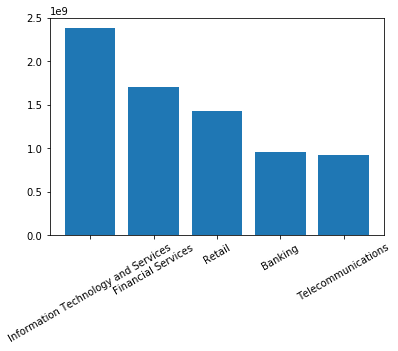

In [42]:
plt.bar(top5.index, top5['employees_on_platform'])
plt.xticks(rotation=30,rotation_mode=None)
plt.show()

In [43]:
data['year'] = [data['as_of_date'][i].year for i in range(0,len(data['as_of_date']))]
ts1 = data.groupby(['year']).sum()

In [153]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

companies = sorted(data['company_name'].unique().tolist())

selection = widgets.Dropdown(options=companies)

@interact
def show_scatter(x=selection):
    selected_company = data[data['company_name']==x]
    plt.plot(selected_company['as_of_date'],selected_company['employees_on_platform'])
    plt.show()
    print(selected_company['employees_on_platform'].mean())

interactive(children=(Dropdown(description='x', options=(' Professional Diversity Network', '1-800-FLOWERS.COM…

In [45]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

industries = data['industry'].unique().tolist()

selection2 = widgets.Dropdown(options=industries)

@interact
def show_scatter2(x=selection2):
    selected_industry = data[data['industry']==x]
    color_dict = dict(zip(sorted(selected_industry['company_name'].unique().tolist()),
                     range(0,len(sorted(selected_industry['company_name'].unique().tolist())))))
    selected_industry['color'] = [color_dict.get(x) for x in selected_industry['company_name']]
    filtered_companies = selected_industry['company_name'].unique().tolist()
    plt.scatter(selected_industry['as_of_date'], 
                selected_industry['employees_on_platform'],
                c = selected_industry['color'])
    plt.show()
    print(selected_industry['employees_on_platform'].mean())
    print(len(filtered_companies))
    print(selected_industry.groupby('company_name').mean()['employees_on_platform'].sort_values(ascending=False))

interactive(children=(Dropdown(description='x', options=('Investment Banking', 'Aviation & Aerospace', 'Pharma…

In [137]:
from fuzzywuzzy import process
import requests
import json

request_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&apikey='

API_KEY = 'VJXO967OSB6W71HO&'

request_url = request_url + API_KEY

stock_tickers = pd.read_csv('stock tickers.csv')

NYSE = stock_tickers[stock_tickers['Exchange']=='NMS']

# @interact
# def show_stock_price(x=selection):
#     listed_name = process.extract(selection.value,NYSE['Name'], limit=1)[0][0]
#     ticker_series = NYSE[NYSE['Name']==listed_name]['Ticker']
#     ticker = ticker_series[ticker_series.index[0]]
#     request_url_2 = request_url + 'symbol={}'.format(ticker)
#     response = requests.get(request_url_2)
#     stock_price =  json.loads(response.text)

#     return stock_price

selected_co = 'Amazon'

listed_name = process.extract(selected_co,NYSE['Name'], limit=1)[0][0]
ticker_series = NYSE[NYSE['Name']==listed_name]['Ticker']
ticker = ticker_series[ticker_series.index[0]]
request_url_2 = request_url + 'symbol={}'.format(ticker)
response = requests.get(request_url_2)
stock_price =  json.loads(response.text)





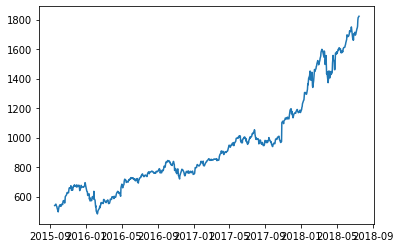

In [232]:
dates = pd.to_datetime(sorted(list(stock_price.get('Time Series (Daily)').keys())))

selected_co_dates = sorted(list(data[data['company_name']==selection.value]['as_of_date']))

min_date = min(selected_co_dates)
max_date = max(selected_co_dates)

filtered_dates = dates[(dates>min_date) & (dates<max_date)]

stock_close = [float(stock_price.get('Time Series (Daily)').get(str(x)).get('4. close')) for x in filtered_dates.date]

plt.plot(filtered_dates,stock_close)
plt.show()

In [231]:
type(stock_close[0])

str

In [211]:
(filtered_dates[0].date())

datetime.date(2015, 9, 17)

In [162]:
data[data['company_name']==selection.value]['as_of_date']

25        2015-09-16
155       2015-09-17
397       2015-09-18
777       2015-09-19
1199      2015-09-20
1672      2015-09-21
2172      2015-09-22
2686      2015-09-23
3218      2015-09-24
3752      2015-09-25
4291      2015-09-26
4830      2015-09-27
5370      2015-09-28
5909      2015-09-29
6451      2015-09-30
6995      2015-10-01
7538      2015-10-02
8083      2015-10-03
8627      2015-10-04
9163      2015-10-05
9588      2015-10-06
10127     2015-10-07
10577     2015-10-08
11126     2015-10-09
11677     2015-10-10
12228     2015-10-11
12779     2015-10-13
13330     2015-10-14
13882     2015-10-15
14433     2015-10-16
             ...    
2313872   2018-06-17
2317510   2018-06-18
2320716   2018-06-19
2326149   2018-06-20
2329638   2018-06-21
2334328   2018-06-22
2340077   2018-06-24
2341673   2018-06-25
2346800   2018-06-26
2349706   2018-06-27
2352084   2018-06-28
2355523   2018-06-29
2360325   2018-06-30
2364220   2018-07-01
2369318   2018-07-02
2370114   2018-07-03
2374118   201

In [200]:
stock_price.get(Time)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events',
  '2. Symbol': 'AMZN',
  '3. Last Refreshed': '2019-11-04 11:16:25',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2019-11-04': {'1. open': '1801.0100',
   '2. high': '1815.0600',
   '3. low': '1801.0100',
   '4. close': '1812.5600',
   '5. adjusted close': '1812.5600',
   '6. volume': '1243724',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0000'},
  '2019-11-01': {'1. open': '1788.0100',
   '2. high': '1797.4449',
   '3. low': '1785.2791',
   '4. close': '1791.4399',
   '5. adjusted close': '1791.4399',
   '6. volume': '2454924',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0000'},
  '2019-10-31': {'1. open': '1775.9900',
   '2. high': '1792.0000',
   '3. low': '1771.4800',
   '4. close': '1776.6600',
   '5. adjusted close': '1776.6600',
   '6. volume': '277910000',
   '7. dividend amount': '0.0000',
   '8. split co

In [180]:
filtered_dates

DatetimeIndex(['2015-09-17', '2015-09-18', '2015-09-21', '2015-09-22',
               '2015-09-23', '2015-09-24', '2015-09-25', '2015-09-28',
               '2015-09-29', '2015-09-30',
               ...
               '2018-07-02', '2018-07-03', '2018-07-05', '2018-07-06',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-16'],
              dtype='datetime64[ns]', length=712, freq=None)

In [114]:
NYSE[NYSE['Name']=='Amazon.com, Inc.']['Ticker']

'AMZN'

In [50]:
stock_tickers

,Ticker,Name,Exchange,Category Name,Country
0,OEDV,"Osage Exploration and Development, Inc.",PNK,NaN,USA
1,AAPL,Apple Inc.,NMS,Electronic Equipment,USA
2,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA
3,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA
4,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA
5,GOOG,Alphabet Inc.,NMS,Internet Information Providers,USA
6,MO,"Altria Group, Inc.",NYQ,Cigarettes,USA
7,DAL,"Delta Air Lines, Inc.",NYQ,Major Airlines,USA
8,AA,Alcoa Corporation,NYQ,Aluminum,USA
9,AXP,American Express Company,NYQ,Credit Services,USA
